In [1]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from keras.metrics import MeanSquaredError
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
import keras.backend as K
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


2024-05-30 15:10:15.507012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Nous repartons des données préalablement nettoyées et enregistrées (notebook Preprocessing)
df = pd.read_csv("data_cleaned.csv", index_col=[0])

Séparation dataset (train/test) & standardisation des valeurs :

In [18]:
X = df.drop("Emission_co2_(g/km)",axis = 1)
y = df["Emission_co2_(g/km)"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modélisation 1

Epoch 1/10
8583/8583 [==============================] - 39s 4ms/step - loss: 6.7758 - r_squared: 0.7820 - mean_squared_error: 251.9592 - val_loss: 4.4144 - val_r_squared: 0.9500 - val_mean_squared_error: 57.8132
Epoch 2/10
8583/8583 [==============================] - 38s 4ms/step - loss: 4.1600 - r_squared: 0.9550 - mean_squared_error: 52.3057 - val_loss: 3.9635 - val_r_squared: 0.9572 - val_mean_squared_error: 49.4693
Epoch 3/10
8583/8583 [==============================] - 35s 4ms/step - loss: 3.8649 - r_squared: 0.9602 - mean_squared_error: 46.2193 - val_loss: 3.7822 - val_r_squared: 0.9611 - val_mean_squared_error: 44.9716
Epoch 4/10
8583/8583 [==============================] - 34s 4ms/step - loss: 3.7093 - r_squared: 0.9628 - mean_squared_error: 43.2664 - val_loss: 3.6546 - val_r_squared: 0.9629 - val_mean_squared_error: 42.9370
Epoch 5/10
8583/8583 [==============================] - 33s 4ms/step - loss: 3.5873 - r_squared: 0.9646 - mean_squared_error: 41.1258 - val_loss: 3.5462 - 

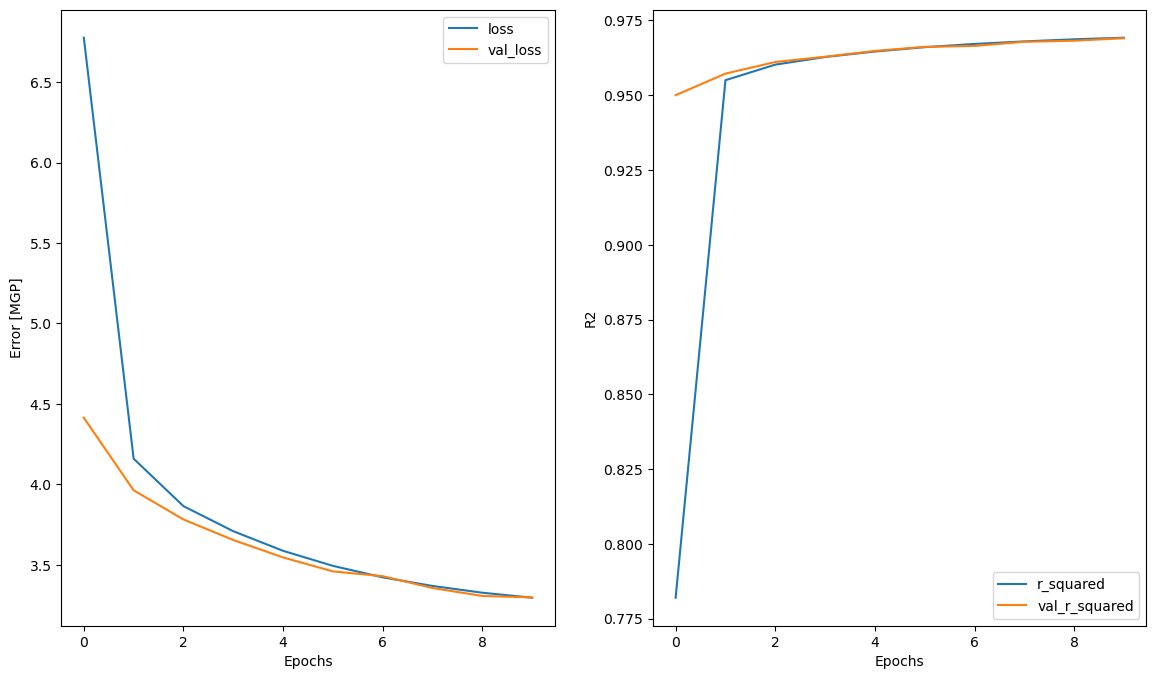

In [20]:
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

inputs = Input(shape = (19), name = "Input")
dense_1 = Dense(units = 64, activation = "relu")
dense_2 = Dense(units = 64, activation = "relu")
dense_3 = Dense(units = 1)

x = dense_1(inputs)
x = dense_2(x)
outputs = dense_3(x)

model_dense = Model(inputs = inputs, outputs = outputs)

model_dense.compile(loss = "mean_absolute_error", optimizer = tf.optimizers.Adam(learning_rate = 0.001), metrics=[r_squared, MeanSquaredError()])

model_history = model_dense.fit(X_train, y_train, epochs = 10, batch_size = 320, validation_split = 0.2)

plt.figure(figsize= (14,8))
plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label = "loss")
plt.plot(model_history.history['val_loss'], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Error [MGP]")
plt.legend();
plt.subplot(1,2,2)
plt.plot(model_history.history['r_squared'], label = "r_squared")
plt.plot(model_history.history['val_r_squared'], label = "val_r_squared")
plt.xlabel("Epochs")
plt.ylabel("R2")
plt.legend();

In [21]:
mae, R2, mse = model_dense.evaluate(X_test, y_test)

print("rmse",np.sqrt(mse))
print("mae", mae)
print("R2", R2)

45979/45979 [==============================] - 97s 2ms/step - loss: 3.2840 - r_squared: 0.9639 - mean_squared_error: 35.0561


[3.283972978591919, 0.9638803601264954, 35.056148529052734]

In [22]:
y_pred = model_dense.predict(X_test)

45979/45979 [==============================] - 81s 2ms/step


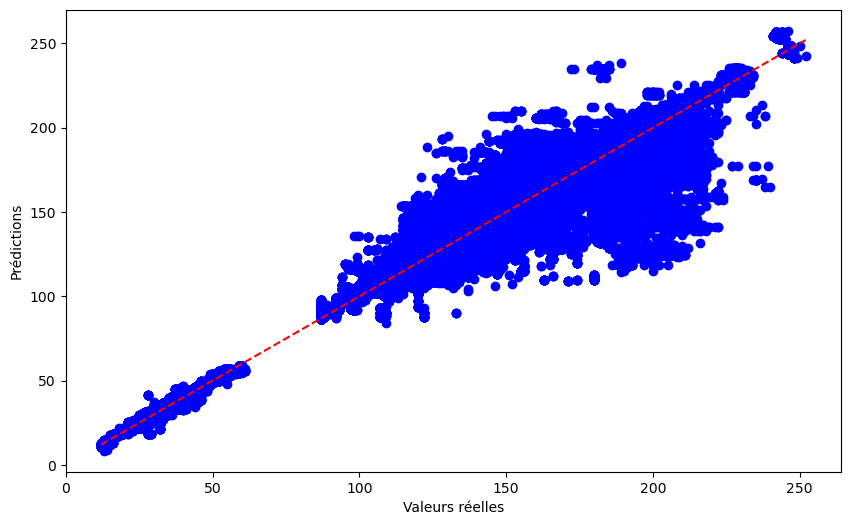

In [23]:
sorted_y_test = np.sort(y_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color = "blue")
plt.plot(sorted_y_test, sorted_y_test, color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.show();

Modélisation 2

Epoch 1/20
8583/8583 [==============================] - 43s 5ms/step - loss: 4.4431 - r_squared: 0.9410 - mean_squared_error: 68.3133 - val_loss: 3.4140 - val_r_squared: 0.9701 - val_mean_squared_error: 34.5239 - lr: 0.0100
Epoch 2/20
8583/8583 [==============================] - 42s 5ms/step - loss: 3.2035 - r_squared: 0.9735 - mean_squared_error: 30.8116 - val_loss: 2.8203 - val_r_squared: 0.9770 - val_mean_squared_error: 26.6264 - lr: 0.0100
Epoch 3/20
8583/8583 [==============================] - 46s 5ms/step - loss: 2.8009 - r_squared: 0.9780 - mean_squared_error: 25.5407 - val_loss: 2.6350 - val_r_squared: 0.9796 - val_mean_squared_error: 23.6365 - lr: 0.0100
Epoch 4/20
8583/8583 [==============================] - 46s 5ms/step - loss: 2.5888 - r_squared: 0.9804 - mean_squared_error: 22.8578 - val_loss: 2.4579 - val_r_squared: 0.9812 - val_mean_squared_error: 21.7483 - lr: 0.0100
Epoch 5/20
8583/8583 [==============================] - 47s 5ms/step - loss: 2.4700 - r_squared: 0.9817 

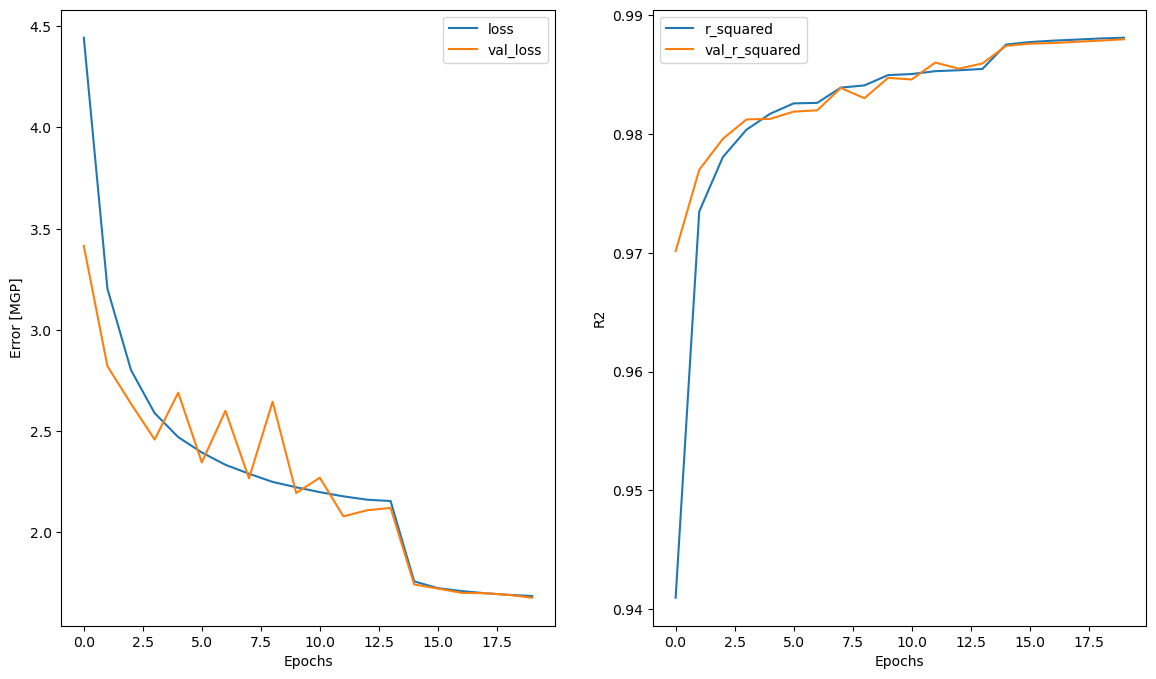

In [24]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',min_delta = 0.01,patience = 2,factor = 0.1,verbose = 1)
early_stopping = EarlyStopping(monitor = 'val_loss',min_delta = 0.01,patience = 5,verbose = 1,mode = "min")

inputs = Input(shape = (19), name = "Input")
dense_1 = Dense(units = 64, activation = "elu")
dense_2 = Dense(units = 128, activation = "elu")
dense_3 = Dense(units = 32, activation = "elu")
dense_4 = Dense(units = 1)

x = dense_1(inputs)
x = dense_2(x)
x = dense_3(x)
outputs = dense_4(x)

model_dense2 = Model(inputs = inputs, outputs = outputs)

model_dense2.compile(loss = "mean_absolute_error", optimizer = tf.optimizers.Adam(learning_rate = 0.01), metrics=[r_squared, MeanSquaredError()])

model_history2 = model_dense2.fit(X_train, y_train, epochs = 20, batch_size = 320, validation_split = 0.2, callbacks = [reduce_learning_rate, early_stopping])

plt.figure(figsize= (14,8))
plt.subplot(1,2,1)
plt.plot(model_history2.history['loss'], label = "loss")
plt.plot(model_history2.history['val_loss'], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Error [MGP]")
plt.legend();
plt.subplot(1,2,2)
plt.plot(model_history2.history['r_squared'], label = "r_squared")
plt.plot(model_history2.history['val_r_squared'], label = "val_r_squared")
plt.xlabel("Epochs")
plt.ylabel("R2")
plt.legend();

In [30]:
mae, R2, mse = model_dense2.evaluate(X_test, y_test)

print("rmse",np.sqrt(mse))
print("mae", mae)
print("R2", R2)

45979/45979 [==============================] - 124s 3ms/step - loss: 1.6731 - r_squared: 0.9861 - mean_squared_error: 13.7476
rmse 3.707776588622909
mae 1.6730870008468628
R2 0.9860907196998596


In [26]:
y_pred2 = model_dense2.predict(X_test)

45979/45979 [==============================] - 79s 2ms/step


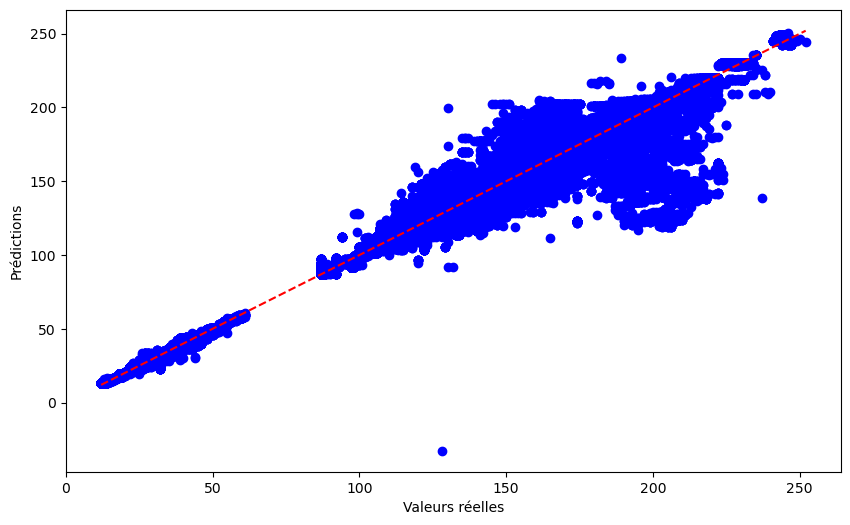

In [27]:
sorted_y_test = np.sort(y_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred2, color = "blue")
plt.plot(sorted_y_test, sorted_y_test, color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.show();

Modélisation 3 

45979/45979 [==============================] - 89s 2ms/step
0.9973867636006897
0.9971716120051701
mse 3.3322761699271064
mae 1.033147842406582


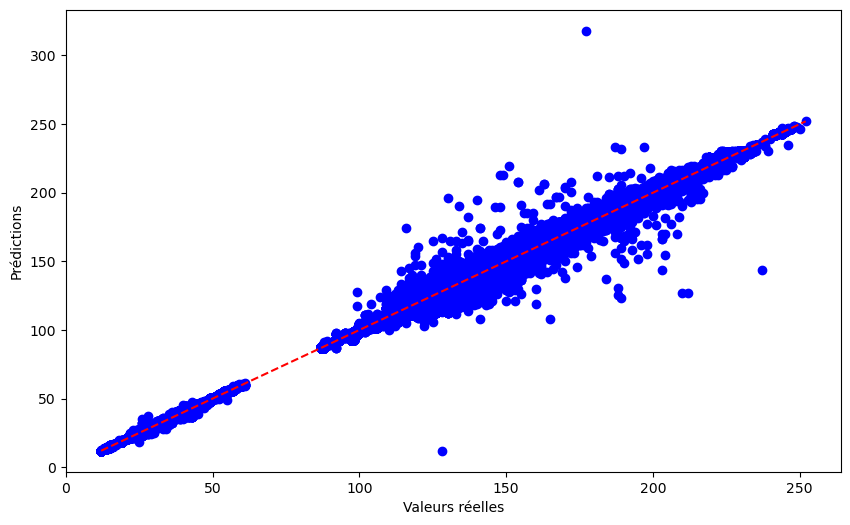

In [28]:
intermediate_layer_model = Model(inputs = model_dense2.inputs, outputs = model_dense2.layers[4].output)
X_train_dl = intermediate_layer_model.predict(X_train)
X_test_dl = intermediate_layer_model.predict(X_test)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_dl,y_train)
print(dt.score(X_train_dl,y_train))
print(dt.score(X_test_dl,y_test))

y_pred_dt = dt.predict(X_test_dl)

print("rmse",np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("mae", mean_absolute_error(y_test, y_pred_dt))

sorted_y_test = np.sort(y_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color = "blue")
plt.plot(sorted_y_test, sorted_y_test, color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.show();